# Analiza i Bazy Danych
## Karol Musiał, grupa 3a
### Laboratorium 10
## "Modelowanie szeregów czasowych"

In [31]:
# Importowanie bibliotek
import pandas as pd
from pandas import DataFrame
import datetime 
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from pmdarima import model_selection
import numpy as np
%matplotlib inline

In [32]:
# Odczytanie danych
DF = pd.read_csv("analiza.csv", sep = ",", decimal = ",")
print(DF.head())
print("\n")
print(DF.describe())
print("\n")
print(DF.shape)

      Data  Rezerwacja
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


       Rezerwacja
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


(144, 2)


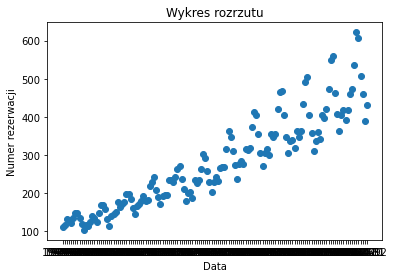

In [33]:
# Wstępny wykres danych
plt.plot("Data", "Rezerwacja", data=DF, linestyle='none', marker='o')
plt.xlabel('Data')
plt.ylabel('Numer rezerwacji')
plt.title('Wykres rozrzutu')
plt.show()

#### <b> Zaobserwowana na wykresie korelacja jest dodatnia, jej typ jest pomiędzy liniowym a wykładniczym. <b>

In [34]:
# Obliczanie ADF
DF_rezerwacja = pd.read_csv('analiza.csv', header=0, index_col=0)
result = adfuller(DF_rezerwacja.values)
print('ADF Statistic: %f' % result[1])
print('p-value: %f' % result[0])
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: 0.991880
p-value: 0.815369
Critial Values:
   1%, -3.4816817173418295
Critial Values:
   5%, -2.8840418343195267
Critial Values:
   10%, -2.578770059171598


#### <b> Wartość ADF Statistic oraz p-value są mniejsze od wartości krytycznych, więc hipoteza zerowa może zostać odrzucona, co oznacza, że zbiór jest stacjonarny. <b>

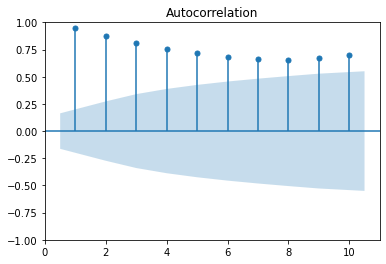

In [36]:
# Wykres funkcji autokorelacji ACF
plot_acf(DF_rezerwacja, zero=False, lags=10)
plt.show()

#### <b> Wykres pokazuje, że największe znaczenie w przewidywaniu przyszłych wyników mają próbki o mniejszym przesunięciu. <b>

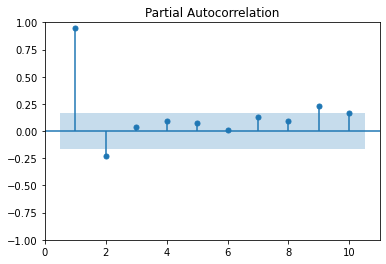

In [41]:
# Wykres częsciowej funkcji autokorelacji PACF
plot_pacf(DF_rezerwacja, zero=False, lags=10, method='ywm')
plt.show()

#### <b> Największe powiązanie ma miejsce w przypadku 1 próbki, wartość bezwzględna korelacji jest bliska 1, dodatkowo korelacja ta jest dodatnia, czyli duże wartości bieżące odpowiadają dużym wartościom przesunięcia. <b>

In [59]:
# Podział szeregu oraz obliczanie kryterium AIC
X = DF_rezerwacja.values
train = X[0:106]
test = X[106:]
predictions = [train, test]
model = ARIMA(DF_rezerwacja, order=(3,0,1), freq="MS")
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             Rezerwacja   No. Observations:                  144
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -698.144
Date:                Wed, 08 Dec 2021   AIC                           1408.288
Time:                        16:02:02   BIC                           1426.107
Sample:                    01-01-1949   HQIC                          1415.528
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.3011     58.857      4.762      0.000     164.944     395.658
ar.L1          0.5019      0.133      3.776      0.000       0.241       0.762
ar.L2          0.5505      0.157      3.506      0.0

C:\Users\Karol\.julia\conda\3\envs\karolmusial\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


#### <b> asd. <b>

In [62]:
# Dobranie najlepszego modelu dla prognozy AUTO-ARIMA
AUTO_ARIMA=pm.auto_arima(DF_rezerwacja, exogenous=None, seasonal=False, m=1, d=1, D=1,
                     max_p=4, max_q=3, trace=True, error_action='ignore', suppress_warning=True)
print(AUTO_ARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

#### <b> asd. <b>

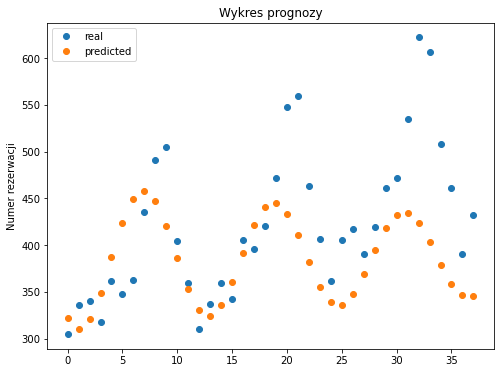

In [92]:
# Wykres prognozy
AUTO_ARIMA.fit(train)
pred = AUTO_ARIMA.predict(38)

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot()
ax1.plot(test, linestyle='none', marker='o', label='real')
ax1.plot(pred, linestyle='none', marker='o', label='predicted')
plt.ylabel('Numer rezerwacji')
plt.title('Wykres prognozy')
plt.legend()
plt.show()

#### <b> Prognoza sprawdziła się całkiem dobrze, większość próbek pokrywa się z rzeczywistymi. W niektórych przypadkach przewidywania mają mniejsze wartości, jednak trend zmian kolejnych próbek jest zachowany. <b>